# Group Assignment 1

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Question 1: Communities and Crime

### 1) Thoroughly examine the dataset. Familiarize yourselves with the 3 data origins. Be aware of potential limitations and/or biases. Discuss any potential shortcomings you may have detected.

The Communities & Crime dataset combines data from the FBI Uniform Crime Report, the 1990 U.S. Census, and the Law Enforcement Management and Administrative Statistics (LEMAS) Survey. Limitations include underreporting in crime data, outdated socioeconomic variables, and incomplete police department statistics. Potential biases stem from selection bias, systemic disparities in policing, and multicollinearity among features, which may distort analysis and model performance.

### 2) Implement and explain the preprocessing steps needed for this dataset, including handling missing values, outlier detection and treatment, and feature scaling (if necessary), among any additional preprocessing step you deem fit. Justify your choices.

In [35]:
#load data set
columns = [
    "state", "county", "community", "communityname", "fold", "population", "householdsize",
    "racepctblack", "racePctWhite", "racePctAsian", "racePctHisp", "agePct12t21",
    "agePct12t29", "agePct16t24", "agePct65up", "numbUrban", "pctUrban", "medIncome",
    "pctWWage", "pctWFarmSelf", "pctWInvInc", "pctWSocSec", "pctWPubAsst", "pctWRetire",
    "medFamInc", "perCapInc", "whitePerCap", "blackPerCap", "indianPerCap", "AsianPerCap",
    "OtherPerCap", "HispPerCap", "NumUnderPov", "PctPopUnderPov", "PctLess9thGrade",
    "PctNotHSGrad", "PctBSorMore", "PctUnemployed", "PctEmploy", "PctEmplManu",
    "PctEmplProfServ", "PctOccupManu", "PctOccupMgmtProf", "MalePctDivorce",
    "MalePctNevMarr", "FemalePctDiv", "TotalPctDiv", "PersPerFam", "PctFam2Par",
    "PctKids2Par", "PctYoungKids2Par", "PctTeen2Par", "PctWorkMomYoungKids", "PctWorkMom",
    "NumIlleg", "PctIlleg", "NumImmig", "PctImmigRecent", "PctImmigRec5",
    "PctImmigRec8", "PctImmigRec10", "PctRecentImmig", "PctRecImmig5", "PctRecImmig8",
    "PctRecImmig10", "PctSpeakEnglOnly", "PctNotSpeakEnglWell", "PctLargHouseFam",
    "PctLargHouseOccup", "PersPerOccupHous", "PersPerOwnOccHous", "PersPerRentOccHous",
    "PctPersOwnOccup", "PctPersDenseHous", "PctHousLess3BR", "MedNumBR", "HousVacant",
    "PctHousOccup", "PctHousOwnOcc", "PctVacantBoarded", "PctVacMore6Mos", "MedYrHousBuilt",
    "PctHousNoPhone", "PctWOFullPlumb", "OwnOccLowQuart", "OwnOccMedVal",
    "OwnOccHiQuart", "RentLowQ", "RentMedian", "RentHighQ", "MedRent", "MedRentPctHousInc",
    "MedOwnCostPctInc", "MedOwnCostPctIncNoMtg", "NumInShelters", "NumStreet", 
    "PctForeignBorn", "PctBornSameState", "PctSameHouse85", "PctSameCity85",
    "PctSameState85", "LemasSwornFT", "LemasSwFTPerPop", "LemasSwFTFieldOps",
    "LemasSwFTFieldPerPop", "LemasTotalReq", "LemasTotReqPerPop", "PolicReqPerOffic",
    "PolicPerPop", "RacialMatchCommPol", "PctPolicWhite", "PctPolicBlack",
    "PctPolicHisp", "PctPolicAsian", "PctPolicMinor", "OfficAssgnDrugUnits",
    "NumKindsDrugsSeiz", "PolicAveOTWorked", "LandArea", "PopDens", "PctUsePubTrans",
    "PolicCars", "PolicOperBudg", "LemasPctPolicOnPatr", "LemasGangUnitDeploy",
    "LemasPctOfficDrugUn", "PolicBudgPerPop", "ViolentCrimesPerPop"
]
crime_df = pd.read_csv('data/raw/communities.data', header = None, names = columns, na_values = '?')
crime_df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [37]:
#dropping columns with more than 50% of the data missing
crime_df.dropna(axis=1, thresh=int(0.5 * crime_df.shape[0]))

#identifying categorical and numeric columns
numeric_cols = crime_df.select_dtypes(include= ['number']).columns
categorical_cols = crime_df.select_dtypes(include=['object']).columns

#fill missing numeric values with the mean
crime_df[numeric_cols] = crime_df[numeric_cols].fillna(crime_df[numeric_cols].mean())

#fill missing categorical values with the mode
crime_df[categorical_cols] = crime_df[categorical_cols].fillna(crime_df[categorical_cols].mode().iloc[0])

crime_df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,58.826829,46188.336597,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,53,58.826829,46188.336597,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,24,58.826829,46188.336597,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,34,5.000000,81440.000000,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,42,95.000000,6096.000000,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03


The steps taken in the preprocessing aim to handle missing data while minimizing bias. Dropping columns with more than 50% missing data ensures that only columns with sufficient information are retained, reducing the risk of including unreliable or irrelevant variables. For numeric columns, filling missing values with the mean is a common practice, but it does assume that the data is missing completely at random (MCAR) and that the mean represents a reasonable estimate. While this approach can be biased if the data is not MCAR, it provides a balanced approach to imputation when no better method is available. Similarly, imputing missing categorical values with the mode assumes that the most frequent category is the best replacement. While this could introduce bias if the missing data is not missing at random, it ensures that categorical variables are not left incomplete. Both methods are commonly used to address missing data

In [39]:
#outlier detection and treatment
#using Z-score to detect outliers and removing rows whwr Z > 3
z_scores = np.abs((crime_df[numeric_cols] - crime_df[numeric_cols].mean()) / crime_df[numeric_cols].std())
crime_df = crime_df[(z_scores < 3).all(axis=1)]

The Z-score method is used to identify outliers by standardizing each value in the dataset relative to the mean and standard deviation of its respective column. By calculating the absolute value of the Z-scores, we can determine how far away a data point is from the mean in terms of standard deviations. Typically, a Z-score greater than 3 (or less than -3) indicates that the data point is far from the mean and may be considered an outlier. Removing these outliers ensures that extreme values do not disproportionately influence the analysis or modeling, which could lead to biased or inaccurate results.

In [41]:
#remove communityname variable since there is already a community variable
crime_df.drop(columns=['communityname'], inplace=True)

The communityname variable is an irrelevant feature since there is already a community variable. Additionally, getting rid of this categorical variable makes the data more suitable for machine learning models which require numeric input

### 3) Perform feature engineering to create at least 3 new features and justify their potential impact on a regression model’s performance. (Feel free to create polynomials and/or interaction terms, as long as you justify your choices

In [43]:
#creating a income inequality ratio, police coverage deficit, and economic hardship index features
new_features = pd.DataFrame({
    'IncomeInequalityRatio': crime_df['PctEmplProfServ'] / (crime_df['PctPopUnderPov'] + 1),
    'PoliceCoverageDeficit': crime_df['ViolentCrimesPerPop'] / crime_df['PolicPerPop'],
    'EconomicHardshipIndex': (crime_df['PctPopUnderPov'] + 
                              crime_df['PctUnemployed'] + 
                              crime_df['PctIlleg']) / 3
})

crime_df = pd.concat([crime_df, new_features], axis=1)

The newly engineered features aim to capture deeper insights into crime rates and socioeconomic conditions, which can enhance the predictive power of a regression model.  IncomeInequalityRatio to capture economic disparities within a community. It measures the ratio of high-income households (represented by the percentage of people employed in professional or service occupations) to low-income households (represented by the percentage of people living under the poverty line). The +1 in the denominator prevents division by zero.PoliceCoverageDeficit measures the adequacy of police presence by comparing violent crime levels to police availability, which can highlight areas where law enforcement resources may be insufficient. EconomicHardshipIndex aggregates key socioeconomic indicators, such as poverty, unemployment, and single-parent households, into a single metric that reflects economic distress, which is often correlated with crime rates. By including these features, the model may better capture underlying patterns and improve its predictive accuracy.

In [45]:
#save as csv
crime_df.to_csv('preprocessed_crime_data.csv', index = False)

### 4) Curate the processed data to the best of your abilities. Include graphs, plots, and descriptive stats. Assume that your audience is highly technical and possesses domain knowledge.

In [49]:
#descriptive stats
crime_df.describe()

,state,county,community,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop,IncomeInequalityRatio,PoliceCoverageDeficit,EconomicHardshipIndex
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,...,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,30.361744,49.744669,45565.590507,5.494549,0.027483,0.445302,0.123191,0.839445,0.106561,0.089633,...,0.159975,0.075194,0.700194,0.432181,0.012953,0.193490,0.177017,0.338518,0.825345,0.250096
std,15.750755,29.236933,16698.350534,2.905287,0.033467,0.118727,0.177674,0.158602,0.119441,0.134028,...,0.019824,0.009233,0.020815,0.061716,0.082253,0.012949,0.162876,0.124110,0.764017,0.141227
min,1.000000,1.000000,70.000000,1.000000,0.000000,0.130000,0.000000,0.230000,0.000000,0.000000,...,0.010000,0.000000,0.540000,0.000000,0.000000,0.040000,0.000000,0.067901,0.000000,0.033333
25%,18.000000,25.000000,46188.336597,3.000000,0.010000,0.350000,0.020000,0.760000,0.030000,0.010000,...,0.163103,0.076708,0.698589,0.440439,0.000000,0.195078,0.060000,0.256637,0.275872,0.140000
50%,34.000000,58.826829,46188.336597,6.000000,0.020000,0.430000,0.050000,0.900000,0.060000,0.030000,...,0.163103,0.076708,0.698589,0.440439,0.000000,0.195078,0.120000,0.318519,0.551744,0.213333
75%,42.000000,58.826829,46188.336597,8.000000,0.040000,0.520000,0.150000,0.960000,0.120000,0.100000,...,0.163103,0.076708,0.698589,0.440439,0.000000,0.195078,0.230000,0.400000,1.103488,0.343333
max,56.000000,187.000000,93955.000000,10.000000,0.290000,0.920000,0.920000,1.000000,0.750000,0.820000,...,0.163103,0.076708,0.940000,0.500000,0.760000,0.250000,0.910000,0.886792,4.250000,0.786667


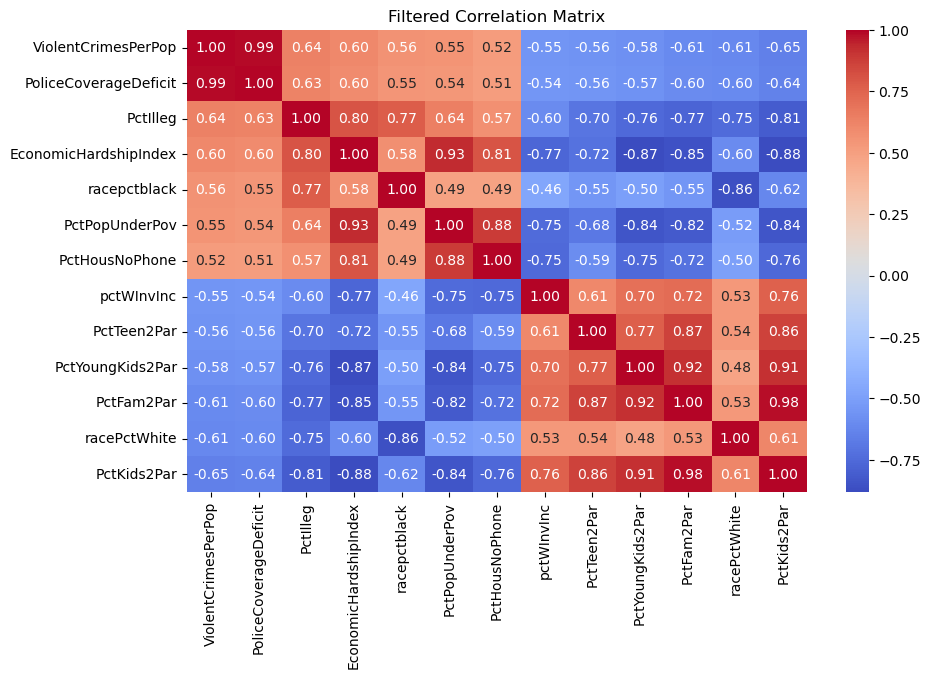

In [59]:
#get the correlation of each feature with the target variable
target_corr = corr_matrix['ViolentCrimesPerPop'].sort_values(ascending=False)

#filter out features with low correlation (you can set a threshold, like 0.2 or 0.3)
relevant_features = target_corr[target_corr.abs() > 0.5].index.tolist()

#recompute the correlation matrix with only relevant features
filtered_corr_matrix = crime_df[relevant_features].corr()

#plot the filtered correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Filtered Correlation Matrix")
plt.show()


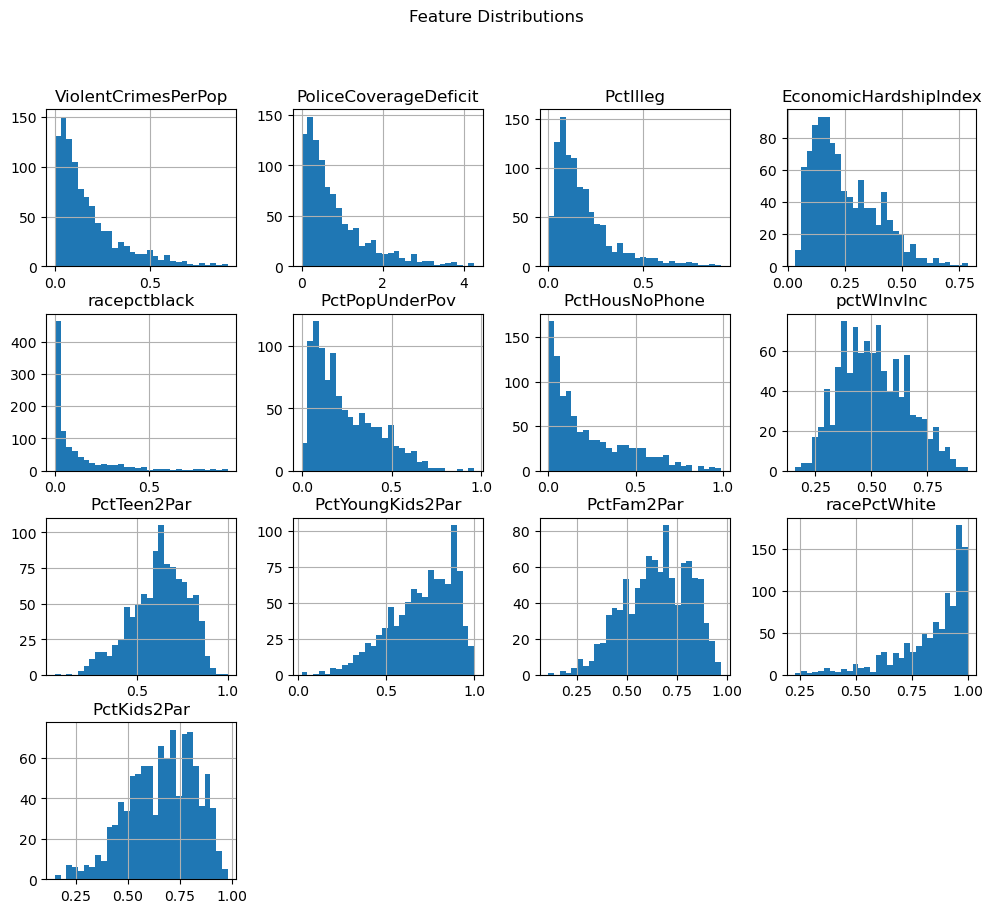

In [61]:
#histograms
crime_df[relevant_features].hist(figsize=(12, 10), bins=30)
plt.suptitle("Feature Distributions")
plt.show()

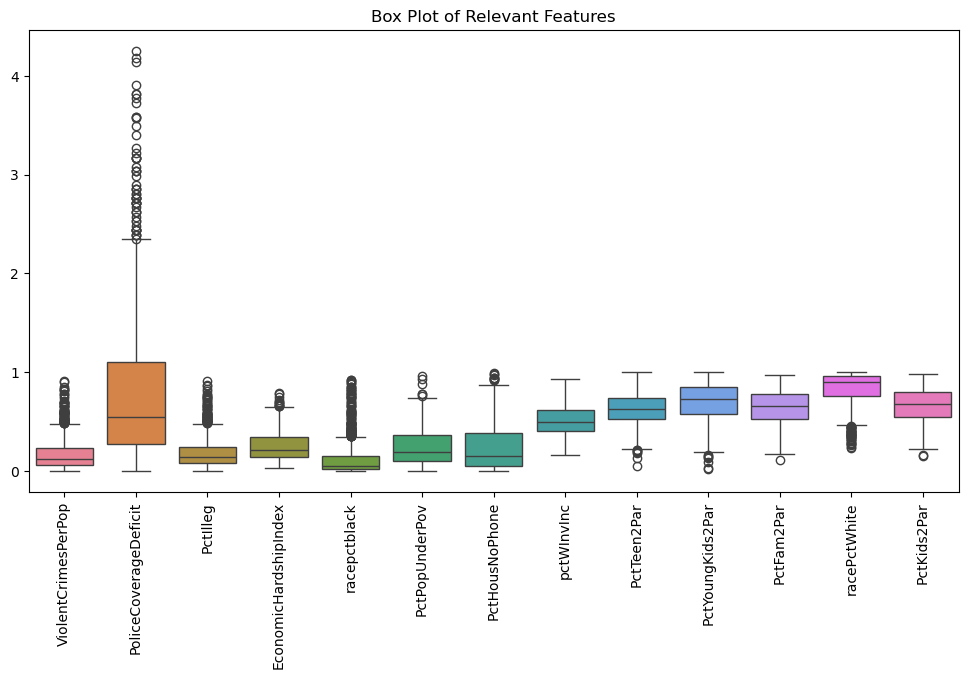

In [63]:
#boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=crime_df[relevant_features])
plt.xticks(rotation=90)
plt.title("Box Plot of Relevant Features")
plt.show()